<a href="https://colab.research.google.com/github/cmd-gunma-univ/DX-highschool/blob/main/%E3%82%82%E3%81%AE%E3%81%A4%E3%81%8F%E3%82%8ADX5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# デジタル通信の基礎

## デジタル通信の変遷


ここでは以下について勉強します。
- パラレル通信
- シリアル通信
  - 非同期式
  - 同期式
    - I2C
    - SPI

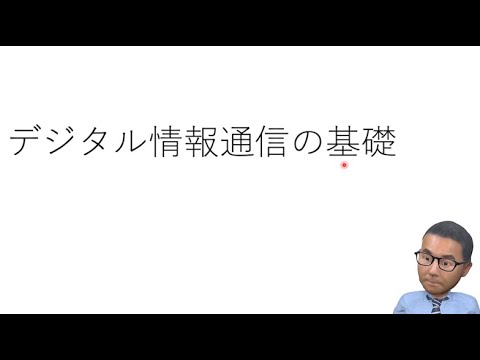

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('q1QIiFfw_68', width=700, height=500)

## 文字のデジタル化

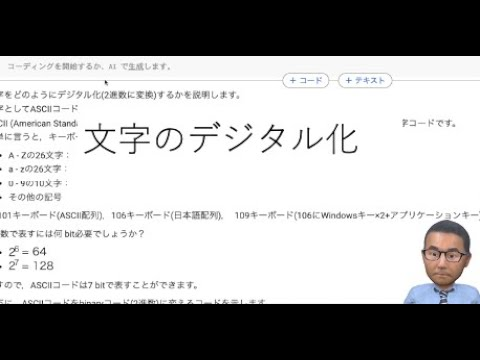

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('IoMrqGA9tgk', width=700, height=500)

文字をどのようにデジタル化(2進数に変換)するかを説明します。\
文字としてASCIIコードを取り扱います。\
ASCII (American Standasrd Code for Information Interchange)はアメリカ合衆国における情報通信用の文字コードです。\
簡単に言うと，キーボードで使う半角文字のことを指します。
- A - Zの26文字：
- a - zの26文字：
- 0 - 9の10文字：
- その他の記号

→ 101キーボード(ASCII配列)，106キーボード(日本語配列)，　109キーボード(106にWindowsキー×2+アプリケーションキー)

2進数で表すには何 bit必要でしょうか？
- $2^6 = 64$
- $2^7 = 128$

ですので，ASCIIコードは7 bitで表すことができます。

以下に，ASCIIコードをbinaryコード(2進数)に変えるコードを示します。

In [ ]:
text = input()
binary_string = ' '.join(format(ord(c), '07b') for c in text)

print(binary_string)

## パラレル通信とシリアル通信

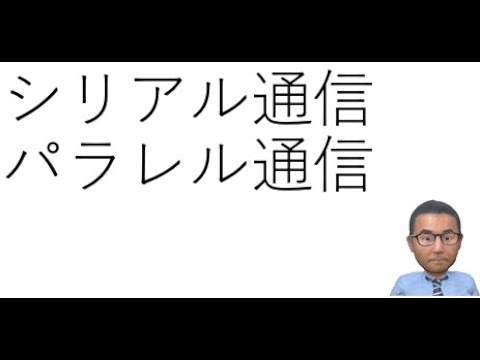

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('NW363pngIY8', width=700, height=500)

In [ ]:
char = 'b'  # 変換したい文字
ascii_code = ord(char)  # 文字をASCIIコードに変換
binary = bin(ascii_code)[2:].zfill(7)  # バイナリに変換し、7ビットに整える
#binary = binary[-5:]
print(binary)

1100010


## シリアル通信を行ってみよう
## (非同期式)

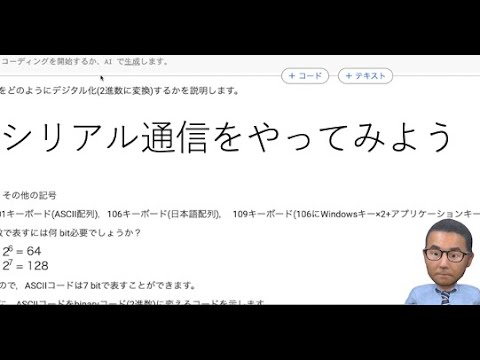

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('j5go4RaUvS8', width=700, height=500)

以下のような回路を作りましょう。
- GPIO3: LED(+)
- GND: LED(-)

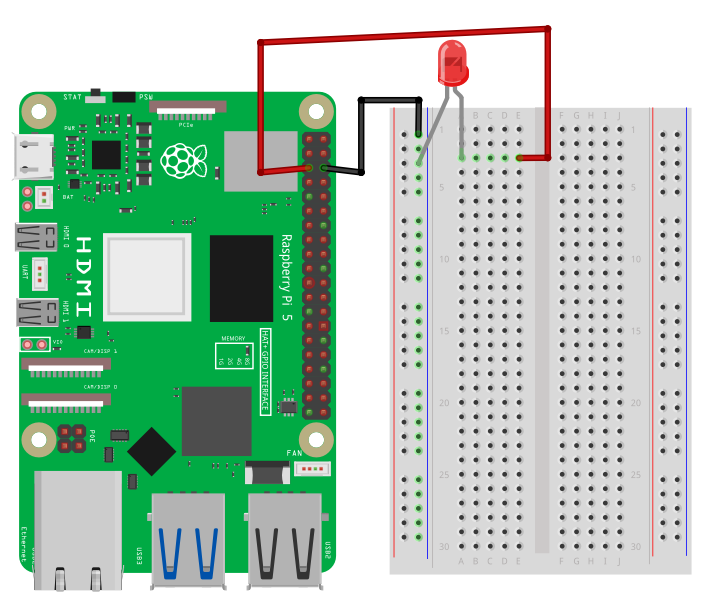

以下は入力したASCIIコードをbinaryに変換して，LEDから送信するコードです。\
送信開始時，終了時に，素早く3回点滅し，1秒おきにシリアル通信として発信します。\
LEDの点滅を隣りの方にデータを読み取ってもらい，自分が発信したコードと同じかどうかを確認しましょう。

In [ ]:
import RPi.GPIO as GPIO
import time

# GPIOピン番号の設定
PIN = 3

# GPIOピン番号のモード設定
GPIO.setmode(GPIO.BCM)

# GPIOピンの出力設定
GPIO.setup(PIN, GPIO.OUT)

GPIO.output(PIN, GPIO.LOW)

text = input()
str = ' '.join(format(ord(c), '07b') for c in text)

print(str)

for j in range(3):
    GPIO.output(PIN, GPIO.HIGH)
    time.sleep(0.1)
    GPIO.output(PIN, GPIO.LOW)
    time.sleep(0.1)

for i in str:
    if i == "0":
        GPIO.output(PIN, GPIO.LOW)
    elif i == "1":
        GPIO.output(PIN, GPIO.HIGH)
    print(i)
    time.sleep(1)  # 1秒待つ

for j in range(3):
    GPIO.output(PIN, GPIO.HIGH)
    time.sleep(0.1)
    GPIO.output(PIN, GPIO.LOW)
    time.sleep(0.1)

GPIO.output(PIN, GPIO.LOW)

以下は，LEDから読み取ったbinaryコードをASCIIコードに変換するコードです。

In [ ]:
def binary_to_ascii(binary_string):
    """
    7bit の2進数を ASCII 文字に変換する関数
    """
    if len(binary_string) % 7 != 0:
        raise ValueError("入力の長さは7bitの倍数である必要があります。")

    ascii_text = ""  # ここで初期化

    for i in range(0, len(binary_string), 7):
        binary_chunk = binary_string[i:i+7]  # 7bit ごとに分割
        ascii_char = chr(int(binary_chunk, 2))  # 2進数を10進数に変換してASCII文字に
        ascii_text += ascii_char  # 文字を結合

    return ascii_text

binary_input = input()
print(binary_to_ascii(binary_input))  # 出力: A

## 同期式

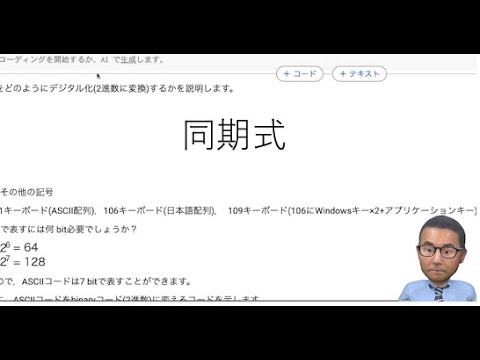

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('HYE1KxqXs6g', width=700, height=500)

以下のような回路を作りましょう。
- GPIO3: LED(+)
- GND: LED(-)
- GPIO4: 緑のLED(+)

追加した，緑のLEDはクロックシグナルです。

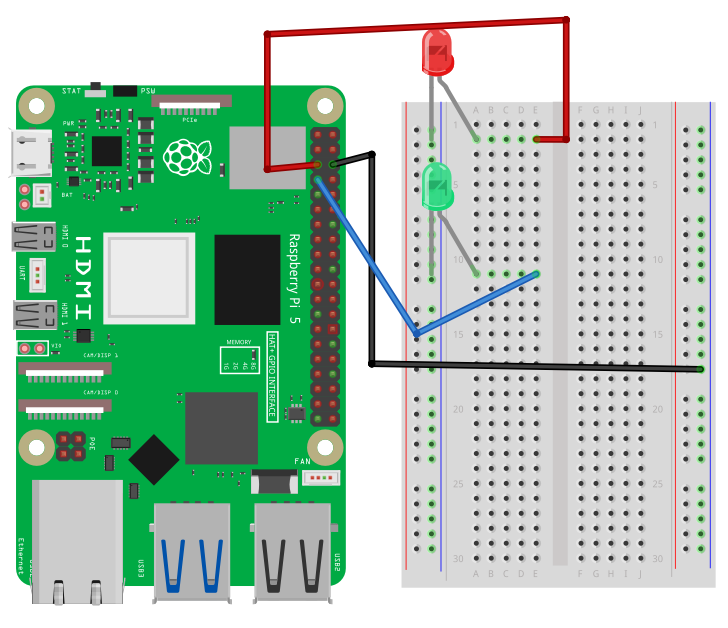

In [ ]:
import RPi.GPIO as GPIO
import time

# GPIOピン番号の設定
PIN3 = 3
PIN4 = 4

# GPIOピン番号のモード設定
GPIO.setmode(GPIO.BCM)

# GPIOピンの出力設定
GPIO.setup(PIN3, GPIO.OUT)
GPIO.setup(PIN4, GPIO.OUT)

GPIO.output(PIN3, GPIO.LOW)
GPIO.output(PIN4, GPIO.LOW)

text = input()
str = ' '.join(format(ord(c), '07b') for c in text)

print(str)

for j in range(3):
    GPIO.output(PIN3, GPIO.HIGH)
    time.sleep(0.1)
    GPIO.output(PIN3, GPIO.LOW)
    time.sleep(0.1)

for i in str:
    GPIO.output(PIN4, GPIO.HIGH)
    if i == "0":
        GPIO.output(PIN3, GPIO.LOW)
    elif i == "1":
        GPIO.output(PIN3, GPIO.HIGH)
    print(i)
    time.sleep(0.1)
    GPIO.output(PIN4, GPIO.LOW)
    if i == "0":
        GPIO.output(PIN3, GPIO.LOW)
    elif i == "1":
        GPIO.output(PIN3, GPIO.HIGH)

    time.sleep(0.9)  # 1秒待つ

for j in range(3):
    GPIO.output(PIN3, GPIO.HIGH)
    time.sleep(0.1)
    GPIO.output(PIN3, GPIO.LOW)
    time.sleep(0.1)

GPIO.output(PIN3, GPIO.LOW)
GPIO.output(PIN4, GPIO.LOW)

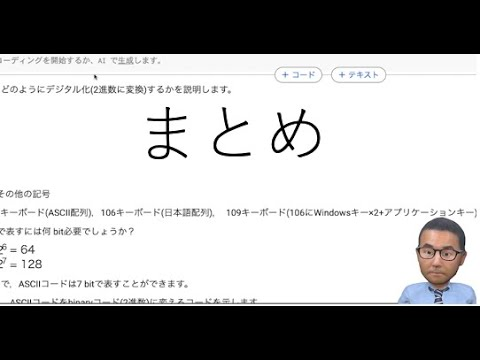

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYZsDfkAnSI', width=700, height=500)